In [36]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio

In [37]:
# Let's check the metadata file first

FILE_PATH = Path("data")
metadata = pd.read_csv(FILE_PATH/ "flood-training-metadata.csv" )
metadata['scene_start'] = pd.to_datetime(metadata['scene_start'])
metadata

,image_id,chip_id,flood_id,polarization,location,scene_start
0,awc00_vh,awc00,awc,vh,Bolivia,2018-02-15
1,awc00_vv,awc00,awc,vv,Bolivia,2018-02-15
2,awc01_vh,awc01,awc,vh,Bolivia,2018-02-15
3,awc01_vv,awc01,awc,vv,Bolivia,2018-02-15
4,awc02_vh,awc02,awc,vh,Bolivia,2018-02-15
...,...,...,...,...,...,...
1079,wvy29_vv,wvy29,wvy,vv,UK,2019-02-15
1080,wvy30_vh,wvy30,wvy,vh,UK,2019-02-15
1081,wvy30_vv,wvy30,wvy,vv,UK,2019-02-15
1082,wvy31_vh,wvy31,wvy,vh,UK,2019-02-15


The data consists of SAR data with two polarization bands, VV and VH.

Let's understand the columns one by one:

image_id- Each polarization band is identified by a unique id. This unique id is a combination of chip_id and the type of polarization.

chip_id- consists of flood_id and the chip_number

flood_id- flood events

polarization- There are two types here vv and vh

location- location of the chips 

scene_start- Date on which the chip was recorded

Text(0.5, 1.02, 'Number of flood_ids present')

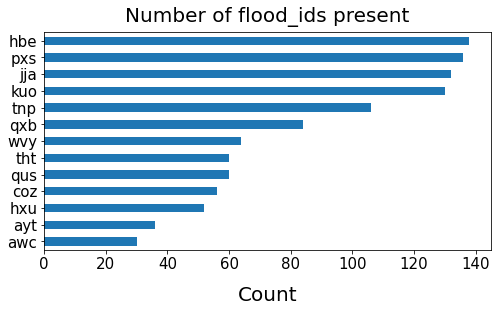

In [38]:
#How many different flood_ids are present in the dataset:

fig = plt.figure()

ax = fig.add_subplot()

metadata['flood_id'].value_counts().sort_values().plot(ax = ax, kind='barh', figsize=(8, 4))
ax.set_xlabel("Count", labelpad=14, fontsize=20)
ax.set_ylabel("", labelpad=14, fontsize=20)
ax.tick_params(labelsize=15)
ax.set_title("Number of flood_ids present", y=1.02,fontsize=20)

There are 542 unique chip_ids where each unique chip_id has both vv and vh bands

In [39]:
metadata['chip_id'].describe()

count      1084
unique      542
top       awc00
freq          2
Name: chip_id, dtype: object

Most data belongs to the location of USA, India, Paraguay, Slovakia and Ghana. The chip_ids(2 bands per chip number) are between 60-70 for these locations.

Text(0.5, 1.02, 'Number of location present')

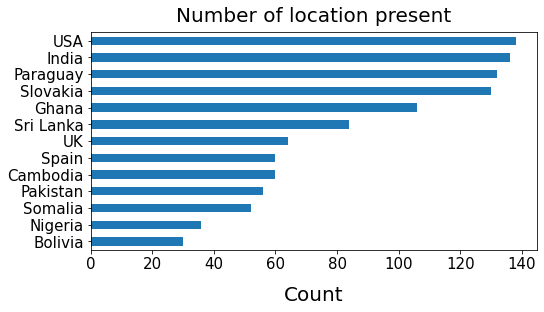

In [40]:
#How many different chip_ids are present in the dataset:

fig = plt.figure()

ax = fig.add_subplot()

metadata['location'].value_counts().sort_values().plot(ax = ax, kind='barh', figsize=(8, 4))
ax.set_xlabel("Count", labelpad=14, fontsize=20)
ax.set_ylabel("", labelpad=14, fontsize=20)
ax.tick_params(labelsize=15)
ax.set_title("Number of location present", y=1.02,fontsize=20)

The year of image capture starts from 2016 and is upto 2020, with most scenes captured are during 2018

In [41]:
year_of_capture = (metadata['scene_start'].dt.year).astype(str)
year_of_capture.value_counts()

2018    416
2019    262
2017    140
2016    136
2020    130
Name: scene_start, dtype: int64

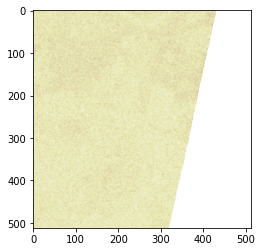

In [42]:
image_path = FILE_PATH/ "train_features/awc00_vh.tif"

src = rasterio.open(image_path)

plt.imshow(src.read(1), cmap='pink')

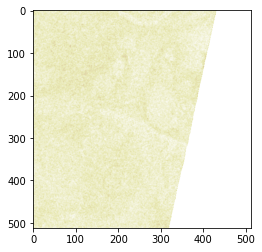

In [43]:
image_path = FILE_PATH/ "train_features/awc00_vv.tif"

src = rasterio.open(image_path)

plt.imshow(src.read(1), cmap='pink')

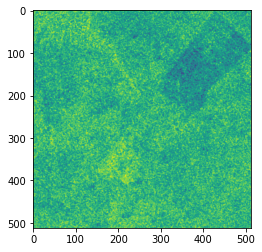

In [44]:
image_path = FILE_PATH/ "train_features/awc05_vh.tif"

src = rasterio.open(image_path)

plt.imshow(src.read(1))

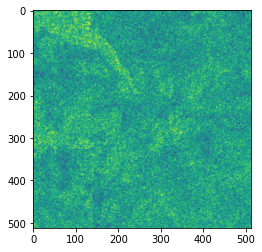

In [45]:
image_path = FILE_PATH/ "train_features/awc05_vv.tif"

src = rasterio.open(image_path)

plt.imshow(src.read(1))

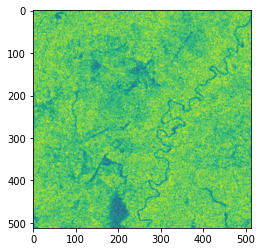

In [46]:
image_path = FILE_PATH/ "train_features/awc10_vh.tif"

src = rasterio.open(image_path)

plt.imshow(src.read(1), cmap = 'viridis')

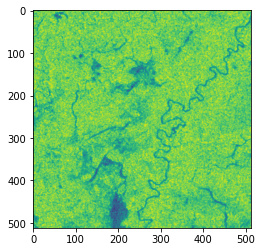

In [47]:
image_path = FILE_PATH/ "train_features/awc10_vv.tif"

src = rasterio.open(image_path)

plt.imshow(src.read(1), cmap = 'viridis')

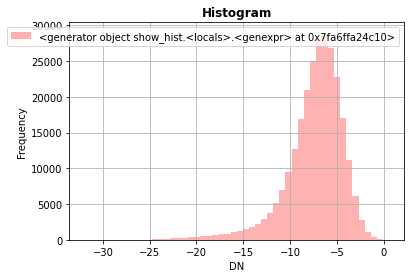

In [48]:
from rasterio.plot import show_hist
show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3,
histtype='stepfilled', title="Histogram")